<a href="https://colab.research.google.com/github/fciolacov/DataScience_Projects/blob/main/Airbnb_New_York_Analise_Exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Airbnb - New York, uma breve análise exporatória de dados
*by Felipe Ciolacov*

---
O [Airbnb](https://www.airbnb.com.br/) é um serviço online comunitário para as pessoas anunciarem, descobrirem e reservarem acomodações e meios de hospedagem.

Airbnb permite aos indivíduos alugar o todo ou parte de sua própria casa, como uma forma de acomodação extra. O site fornece uma plataforma de busca e reservas entre a pessoa que oferece a acomodação e o turista que busca pela locação.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

O Airbnb disponibiliza alguns dados no site sobre hospedagens das principais cidades do mundo. No portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), consegue-se encontrar e baixar uma boa quantidade de dados, no qual escolhi uma dessas bases para desenvolver esse projeto de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

Neste **notebook**, irei prepar e analisar alguns dados referentes à cidade de New York, e ver quais insights podem ser extraídos a partir desses dados.

O **EDA** ou *Exploratory Data Analysis* é utilizado na analise de dados e que por intermédio de técnicas, gráficas em sua maioria, tem por objetivo detectar inconsistência nos dados (outliers), maximizar insights, auxiliar no entendimento da *história dos dados*, entre outros.


## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será utilizado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in New York (good for visualisations).*

In [ ]:
# importação das librarys necessarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [ ]:
# importação do arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2021-02-04/visualisations/listings.csv")


## Análise dos Dados

Esta etapa é importante para se obter um entendimento de como os dados estão estruturados.


In [ ]:
# demonstração das 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,100,30,48,2019-11-04,0.35,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,73,1,386,2021-01-27,4.99,1,249
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,30,50,2019-12-02,0.35,1,365
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76468,-73.98315,Private room,79,2,474,2020-09-25,3.31,1,343
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,75,2,118,2017-07-21,0.85,1,0


A partir de um preview dos dados, será montado um dicionário dos dados. Com isso, poderá se ter uma fácil visualização de quais os dados disponíveis para as analises.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - grupo de bairros ou distritos/condados
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Aqui serão identificados as quantidades de entradas que o conjunto de dados possui e ver os tipos de cada coluna. (Lembrando-se que está sendo utilizado a versão resumida dos dados)



In [ ]:
# identificando o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificando as 5 primeiras entradas do dataset
display(df.dtypes)

# verificando as 5 primeiras entradas do dataset


Entradas:	 37012
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Analise dos valores nulos, se são significativos comparados ao total de entradas. Esse passo é importante para saber a qualidade do *dataset* analisado. 
 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em pouco mais de 25% das linhas.
* As variáveis `name` e `host_name` juntas têm aproximadamente 0,01% dos valores nulos.

In [ ]:
# ordenação em ordem decrescente por valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


reviews_per_month                 0.257295
last_review                       0.257295
host_name                         0.000486
name                              0.000351
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para melhor visualizar a distribuição das variáveis, é boa prática plotar o histograma das variáveis disponíveis.

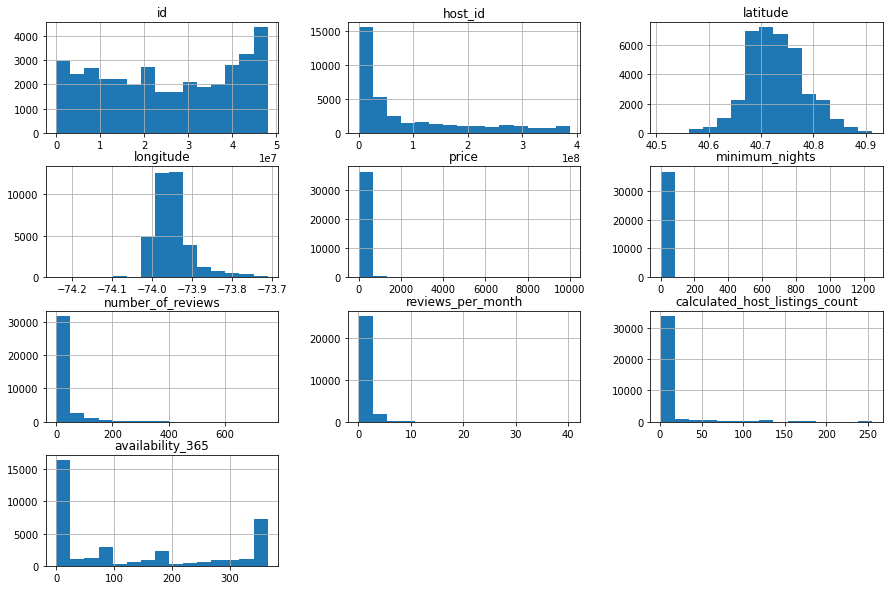

In [ ]:
# plotagem em histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

Pela distribuição do histograma é possível verificar indícios da presença de *outliers*, nas variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Esses valores em questão não estão seguindo uma distribuição e distorcendo a representação gráfica.

Para confirmar essas hipóteses das variáveis em questão, é indicado efetuar um resumo estatístico:

#### *Describe* das variáveis numéricas

O *describe* demonstra o resumo estatístico das váriaveis selecionadas em questão.

In [ ]:
# verificando o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,37012.000000,37012.000000,37012.000000,27489.000000,37012.000000,37012.000000
mean,142.842240,23.323679,22.904112,0.867197,9.405220,130.282800
std,275.740987,26.441255,47.864720,1.320503,31.613257,146.635272
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,60.000000,4.000000,0.000000,0.110000,1.000000,0.000000
50%,99.000000,30.000000,4.000000,0.360000,1.000000,66.000000
75%,151.000000,30.000000,20.000000,1.120000,2.000000,292.000000
max,10000.000000,1250.000000,753.000000,40.310000,255.000000,365.000000


Analisando resumo estatístico acima de cada variável numérica, é possível confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 151, porém seu valor máximo é 10000 e mínimo 0 (provável inconsistência nesses dados).
* A quantidade máxima de noites (`minimum_nights`) está acima de 365 dias no ano (aqui existe uma inconsistência visível).

#### Boxplot para minimum_nights


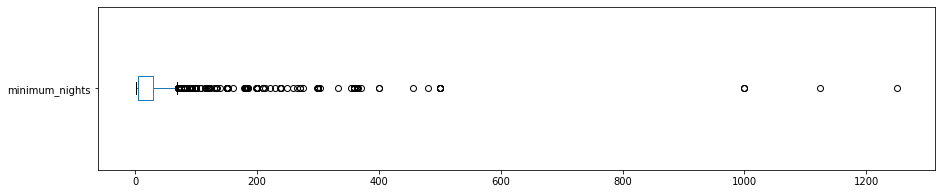

minimum_nights: valores acima de 30:
1170 entradas
3.1611%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# verificando quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para *price*

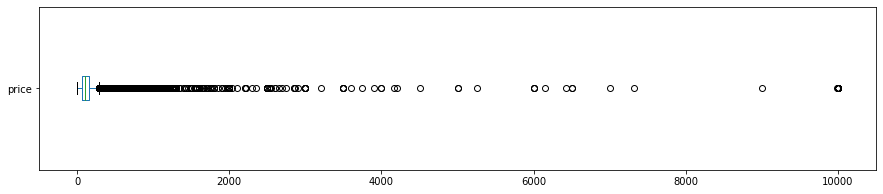


price: valores acima de 200
5165 entradas
13.9549%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# verificando quantidade de valores acima de 300 para price
print("\nprice: valores acima de 200")
print("{} entradas".format(len(df[df.price > 200])))
print("{:.4f}%".format((len(df[df.price > 200]) / df.shape[0])*100))


#### Histogramas sem *outliers*

Já identificado os *outliers* nas variáveis `price` e `minimum_nights`, deve-se limpar o *DataFrame* e plotar novamente o histograma.

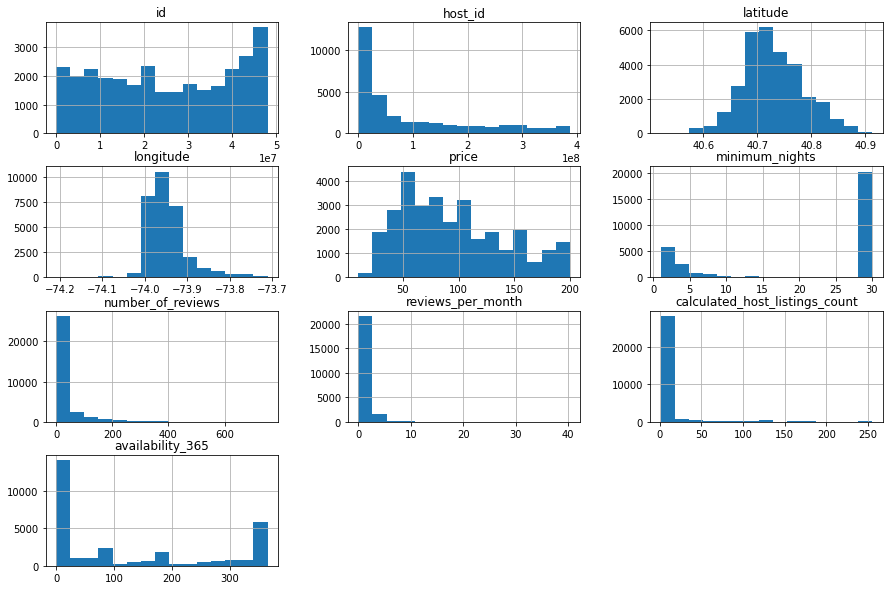

In [ ]:
# removendo os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 200].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price <= 0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)


# plotagem do histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

Conforme excluídos os *outliers* e analisados os dados, a média de preços de aluguel é U$94,45.


In [ ]:
# verificação da média da coluna `price``
df_clean.price.describe()

count    30859.000000
mean        94.453806
std         46.414594
min         10.000000
25%         56.000000
50%         85.000000
75%        125.000000
max        200.000000
Name: price, dtype: float64

In [ ]:
# verificação da média da coluna `price``
df_clean.price.mean()



94.45380602093392

### **Q5. Qual a correlação existente entre as variáveis?**

Análise de correlação entre as variáveis, conforme o coeficiente de correlação (mais forte quando mais próximo do valor 1). 


In [ ]:
# criacao uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

In [ ]:
# mostrando a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.029388,-0.003082,-0.050711,-0.100790,-0.019216
minimum_nights,0.029388,1.000000,-0.255237,-0.396015,0.126532,-0.145465
number_of_reviews,-0.003082,-0.255237,1.000000,0.680381,-0.105815,0.162472
reviews_per_month,-0.050711,-0.396015,0.680381,1.000000,-0.048934,0.189339
calculated_host_listings_count,-0.100790,0.126532,-0.105815,-0.048934,1.000000,0.190815
availability_365,-0.019216,-0.145465,0.162472,0.189339,0.190815,1.000000


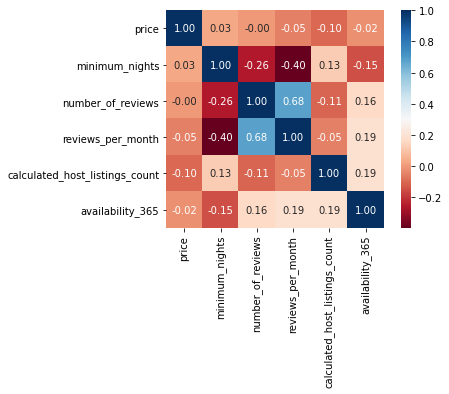

In [ ]:
# plotando um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


Conforme a matriz de correlação e o heatmap, o coeficiente mais forte está entre os *number_of_reviews* e *reviews_per_month*, que obviamente possuem uma relação. Nenhuma outra correlação detectada.


### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

É possível verificar o tipo de imóvel mais alugado. O *Private Room* se mostrou o imóvel mais alugado.


In [ ]:
# mostrando a quantidade de cada tipo de imóvel 
df_clean.room_type.value_counts()

Private room       15797
Entire home/apt    14275
Shared room          631
Hotel room           156
Name: room_type, dtype: int64

In [ ]:
# mostrando a porcentagem de cada tipo de imóvel 
var = df_clean.room_type.value_counts() / df_clean.shape[0] *100
var.round(2)


Private room       51.19
Entire home/apt    46.26
Shared room         2.04
Hotel room          0.51
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara do dataset?**



Abaixo seguem as médias de preços por bairros ou localidades. 

Adicionando uma pequena análise é possivel verificar que o numero de hospedagens pelos dois bairros com maior média de valor são muito pequenas, portanto distorcem esse tipo de informação.


In [ ]:
# verificando preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Huguenot             180.000000
Belle Harbor         165.500000
Howland Hook         152.500000
Prince's Bay         145.000000
Tribeca              142.868421
DUMBO                137.000000
Bay Terrace          135.250000
West Village         134.969072
Westerleigh          134.500000
Battery Park City    133.562500
Name: price, dtype: float64

In [ ]:
# plotando os imóveis pela latitude-longitude
df_clean[df_clean.neighbourhood == "Huguenot"]


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
13442,17554298,The Sweet Pea Cottage,76840423,Kathleen,Huguenot,40.54003,-74.16852,Entire home/apt,180,1,218,2021-01-23,4.59,1,257


In [ ]:
df_clean[df_clean.neighbourhood == "Belle Harbor"]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
18813,25476912,3rd floor: Charming 2 BR guest suite with balcony,38675275,Margaret,Belle Harbor,40.57506,-73.84995,Private room,131,30,47,2020-11-15,2.10,2,357
19862,27549628,Charming two-bedroom suite in Rockaway Beach,38675275,Margaret,Belle Harbor,40.57567,-73.84911,Entire home/apt,200,30,67,2020-09-20,2.24,2,358


Abaixo segue a média por condado. Essa análise adicional demonstra que *Manhattan* e *Brooklyn* possuem as médias de valores mais condizentes com a realidade, já que os numeros de hospedagens são similares e bastante significativos.


In [ ]:
df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)

neighbourhood_group
Manhattan        107.259486
Brooklyn          90.181968
Staten Island     84.293233
Bronx             74.736156
Queens            74.587067
Name: price, dtype: float64

In [ ]:
df_clean.groupby(['neighbourhood_group']).price.count().sort_values(ascending=False)

neighbourhood_group
Brooklyn         12744
Manhattan        12598
Queens            4330
Bronx              921
Staten Island      266
Name: price, dtype: int64

Podemos plotar um gráfico de mapa para melhor visualizar a variação de preços por localidade

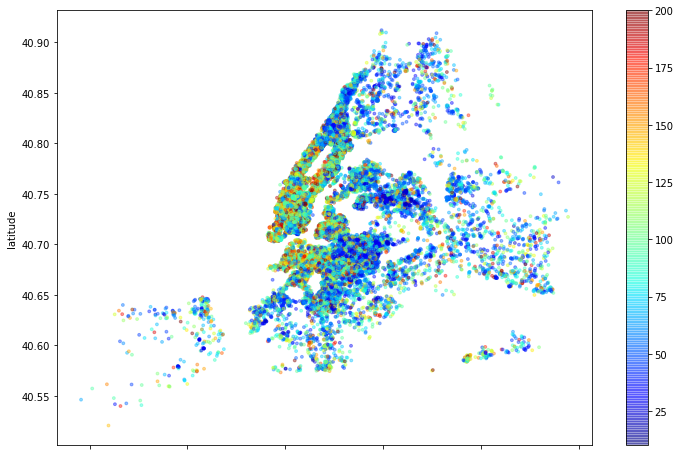

In [ ]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Temos como média do *minimum_nights* = 30

In [ ]:
# verificando a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()
 

20.976019961761562

## Conclusões


Essa é apenas uma análise superficial na base de dados do Airbnb utilizando esse dataset resumido. Apesar de simples, com essa análise foi possível perceber que existem outliers em algumas das variáveis e onde são necessários o tratamento adequado.

Também notou-se que em algumas localidades há poucos imóveis/hospedagens disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Para uma análise exploratória mais profunda é recomendado utilizar o conjunto de dados completos, que contém 106 atributos disponíveis e portanto pode proporcionar uma gama maior de análises.

Essa análise também proporciona uma breve visão do poder do *Python* para a lidar com dados e como ele torna mais fácil esse tipo de projeto, absorvendo muita digitação, cálculos e planilhas!
